In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [126]:
data=pd.read_csv(r'E:\datasets\Amazon Best seller\bestsellers with categories.csv')
data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


# Counts

### Total Number of books

There are some duplicacies. So we will remove those books.

In [127]:
no_of_books=set(data['Name'])
print("Total number of after removing duplicate book names: ", len(no_of_books))

Total number of after removing duplicate book names:  351


### Total Number of Authors

In [128]:
no_of_authors=set(data['Author'])
print('Total number of authors: ',len(no_of_authors))

Total number of authors:  248


### Total Number of Non Fictional books

In [129]:
data1=data.drop_duplicates(subset='Name', keep="last")

In [130]:
no_of_non_fictionbooks=data1.loc[data1['Genre']=='Non Fiction', :]
print('Number of Non Fiction books:', len(no_of_non_fictionbooks))

Number of Non Fiction books: 191


### Total Number of Fictional books

In [131]:
no_of_fictionbooks=data1.loc[data1['Genre']=='Fiction', :]
print('Number of Fiction books:', len(no_of_fictionbooks))

Number of Fiction books: 160


### Most popular books

From number of reviews, we can assume that which book is popular. We will select top 5 popular books.

In [190]:
popular_books=data.nlargest(5,['Reviews'])
popular_books

,Name,Author,User Rating,Reviews,Price,Year,Genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction
383,The Girl on the Train,Paula Hawkins,4.1,79446,7,2016,Fiction
33,Becoming,Michelle Obama,4.8,61133,11,2019,Non Fiction
137,Gone Girl,Gillian Flynn,4.0,57271,9,2014,Fiction
368,The Fault in Our Stars,John Green,4.7,50482,13,2014,Fiction


# Descriptive Statistics and Data Visualization

In [132]:
data1.describe()

,User Rating,Reviews,Price,Year
count,351.000000,351.000000,351.000000,351.000000
mean,4.609117,9786.578348,12.994302,2014.116809
std,0.226721,10874.702548,10.017412,3.374785
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,3442.500000,8.000000,2011.000000
50%,4.600000,6310.000000,11.000000,2014.000000
75%,4.800000,11470.500000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


After observing the descriptive statistics, the monimumm price value is '0'. So we will eliminate these values.

In [133]:
price_zeros=data1[data1['Price']==0]
price_zeros

,Name,Author,User Rating,Reviews,Price,Year,Genre
42,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,4505,0,2011,Fiction
71,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,6812,0,2013,Fiction
116,Frozen (Little Golden Book),RH Disney,4.7,3642,0,2014,Fiction
193,JOURNEY TO THE ICE P,RH Disney,4.6,978,0,2014,Fiction
219,Little Blue Truck,Alice Schertle,4.9,1884,0,2014,Fiction
358,The Constitution of the United States,Delegates of the Constitutional,4.8,2774,0,2016,Non Fiction
381,The Getaway,Jeff Kinney,4.8,5836,0,2017,Fiction
461,The Short Second Life of Bree Tanner: An Eclip...,Stephenie Meyer,4.6,2122,0,2010,Fiction


In [134]:
data=data1[data1['Price']!= 0]
data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [153]:
data.describe()

,User Rating,Reviews,Price,Year
count,343.000000,343.000000,343.000000,343.000000
mean,4.605831,9931.591837,13.297376,2014.128280
std,0.227806,10955.174696,9.932472,3.396918
min,3.300000,37.000000,1.000000,2009.000000
25%,4.500000,3483.500000,8.000000,2011.000000
50%,4.600000,6540.000000,12.000000,2014.000000
75%,4.800000,11646.000000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


### Probability Distribution

#### Price

4.191361313040702

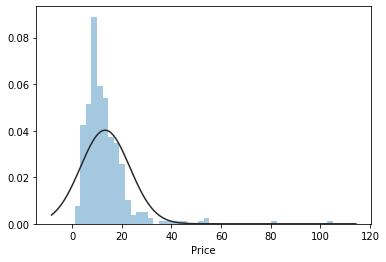

In [152]:
sns.distplot(data['Price'], fit=stats.norm, kde=False)
stats.skew(data['Price'])

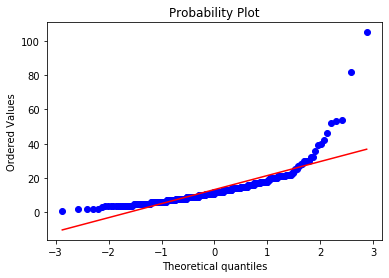

In [171]:
stats.probplot(data['Price'], dist="norm", plot=plt)
plt.show()

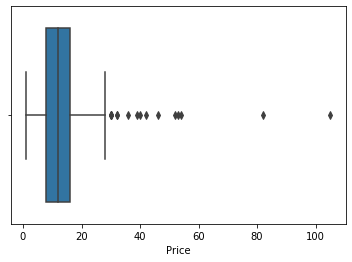

In [142]:
sns.boxplot(data['Price'])

From the above box plot we can see prices are skewed positively, which is not good. hence we ten to reuce the skewness using log transformation.

-0.0714969699644968

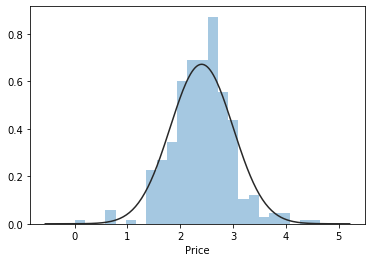

In [158]:
sns.distplot(np.log(data['Price']), fit=stats.norm, kde=False)
stats.skew(np.log(data['Price']))

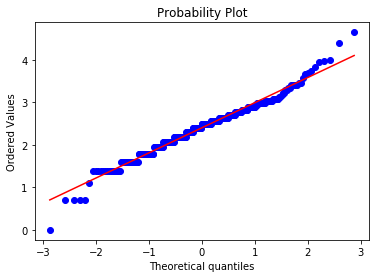

In [170]:
stats.probplot(np.log(data['Price']), dist="norm", plot=plt)
plt.show()

We can see in Q-Q plot that there is change in nature of data, log transformation has reduced the skewness.

### Count of books for particular rating

In [184]:
rating_count=data['User Rating'].value_counts().to_frame().style.bar()
rating_count

,User Rating
4.8,77
4.6,66
4.7,65
4.5,39
4.9,27
4.4,26
4.3,21
4.2,8
4.1,5
4.0,4


### Year and its tatistics

Below we can see, best books year wise and average reviews, user rating and price

In [197]:
year_statistics=data.groupby('Year')['Reviews','User Rating','Price'].agg(['count','mean'])
year_statistics

C:\Users\INNER\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Reviews               User Rating           Price           
       count          mean       count      mean count       mean
Year                                                             
2009      38   3731.657895          38  4.600000    38  15.657895
2010      32   3627.812500          32  4.540625    32  12.218750
2011      26   5078.961538          26  4.507692    26  14.730769
2012      32  10694.250000          32  4.546875    32  15.000000
2013      27   9448.407407          27  4.529630    27  12.259259
2014      27  15514.629630          27  4.559259    27  19.074074
2015      28   9847.178571          28  4.639286    28   9.571429
2016      25  13549.760000          25  4.680000    25  16.200000
2017      28  10211.892857          28  4.607143    28  12.678571
2018      31  10079.129032          31  4.616129    31  11.193548
2019      49  16071.857143          49  4.746939    49  10.020408

### How many books have more than 50 dollars and having rating atleast 4.5

In [225]:
books_exp=data.loc[(data['Price']>=50) & (data['User Rating']>=4.5), :]
books_exp

,Name,Author,User Rating,Reviews,Price,Year,Genre
70,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2014,Non Fiction
151,Hamilton: The Revolution,Lin-Manuel Miranda,4.9,5867,54,2016,Non Fiction
159,Harry Potter Paperback Box Set (Books 1-7),J. K. Rowling,4.8,13471,52,2016,Fiction
346,The Book of Basketball: The NBA According to T...,Bill Simmons,4.7,858,53,2009,Non Fiction
473,The Twilight Saga Collection,Stephenie Meyer,4.7,3801,82,2009,Fiction


In [226]:
len(books_exp)

5

### Author Statistics

Popular Author

In [246]:
data['Author'].value_counts().nlargest(5).to_frame()

,Author
Rick Riordan,10
Jeff Kinney,9
Bill O'Reilly,6
J.K. Rowling,6
Dav Pilkey,6


Authorwith highest user ratings for all their work

In [263]:
data['User Rating'].groupby(data['Author']).value_counts().nlargest(5).to_frame()

,,User Rating
Author,User Rating,
Rick Riordan,4.8,8
Jeff Kinney,4.8,7
Dav Pilkey,4.9,6
Stephenie Meyer,4.7,4
Bill O'Reilly,4.6,3


In [253]:
data['Genre'].groupby(data['Author']).value_counts().nlargest(5).to_frame()

,,Genre
Author,Genre,
Rick Riordan,Fiction,10
Jeff Kinney,Fiction,9
Bill O'Reilly,Non Fiction,6
Dav Pilkey,Fiction,6
J.K. Rowling,Fiction,6


In [282]:
pd.pivot_table(data, index = 'Year', columns = 'Genre', values = 'Price' ).head()

Genre,Fiction,Non Fiction
Year,,
2009,17.550000,13.555556
2010,10.307692,13.526316
2011,12.428571,17.416667
2012,13.857143,15.888889
2013,12.916667,11.733333


In [285]:
import requests
url='https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019/download'
df=pd.read_csv(url)
df

HTTPError: HTTP Error 429: Too Many Requests